### check_statistics

In [8]:
import SimpleITK as sitk
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)



In [9]:
statistics_path='/home/kakeya/Desktop/higuchi/20191021/output/statistics.csv'
st_df=pd.read_csv(statistics_path,index_col=0)

In [10]:
print(st_df['lumi_min_SE2_cys'].min(),st_df['lumi_min_SE2_CCR'].min(),st_df['lumi_min_SE3_cys'].min(),st_df['lumi_min_SE3_CCR'].min())
print(st_df['lumi_max_SE2_cys'].max(),st_df['lumi_max_SE2_CCR'].max(),st_df['lumi_max_SE3_cys'].max(),st_df['lumi_max_SE3_CCR'].max())

-324.0 -999.0 -490.57703 -999.9867
487.0 890.0 367.42126 867.0001


In [11]:
cols=[col for col in st_df.columns if '_min' in col]


In [12]:
st_df.columns

Index(['count', 'count_CCR', 'count_cys', 'shape_kid', 'shape_CCR',
       'shape_cys', 'lumi_mean', 'lumi_std', 'lumi_max', 'lumi_min',
       'lumi_mean_SE2_CCR', 'lumi_std_SE2_CCR', 'lumi_max_SE2_CCR',
       'lumi_min_SE2_CCR', 'lumi_mean_SE2_cys', 'lumi_std_SE2_cys',
       'lumi_max_SE2_cys', 'lumi_min_SE2_cys', 'lumi_mean_SE3_kid',
       'lumi_std_SE3_kid', 'lumi_max_SE3_kid', 'lumi_min_SE3_kid',
       'lumi_mean_SE3_CCR', 'lumi_std_SE3_CCR', 'lumi_max_SE3_CCR',
       'lumi_min_SE3_CCR', 'lumi_mean_SE3_cys', 'lumi_std_SE3_cys',
       'lumi_max_SE3_cys', 'lumi_min_SE3_cys'],
      dtype='object')

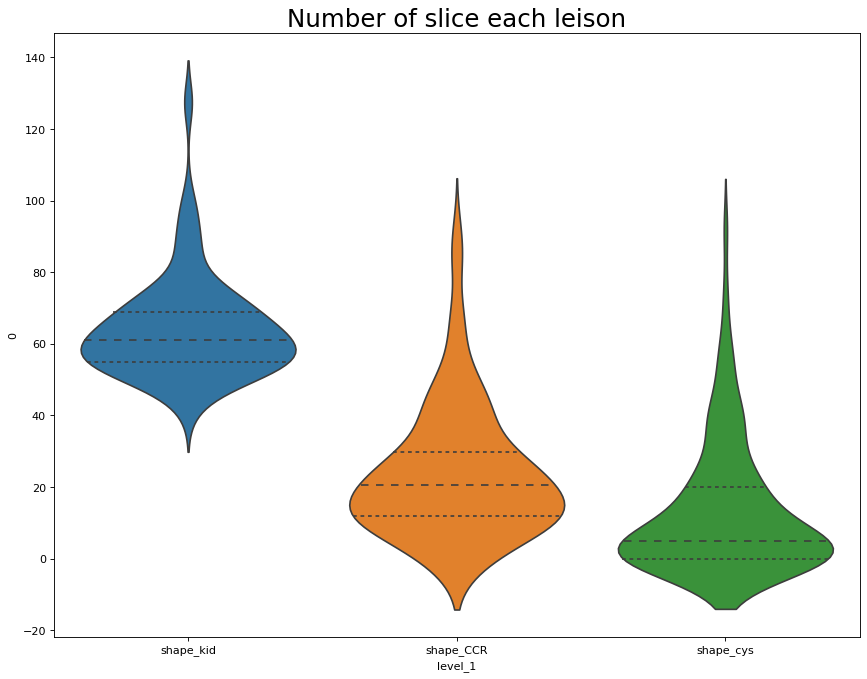

In [13]:
cols=['shape_kid','shape_CCR','shape_cys']
#縦持ちデータに変換
count_df=st_df[cols].stack().reset_index()
plt.figure(figsize=(13,10), dpi=80)
sns.violinplot(x='level_1', y=0, data=count_df, scale='width', inner='quartile')
plt.title('Number of slice each leison', fontsize=22)
plt.savefig('Violin_Number_of_slice.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../output/EDA_result/1030/violin_lumi_mean.png'

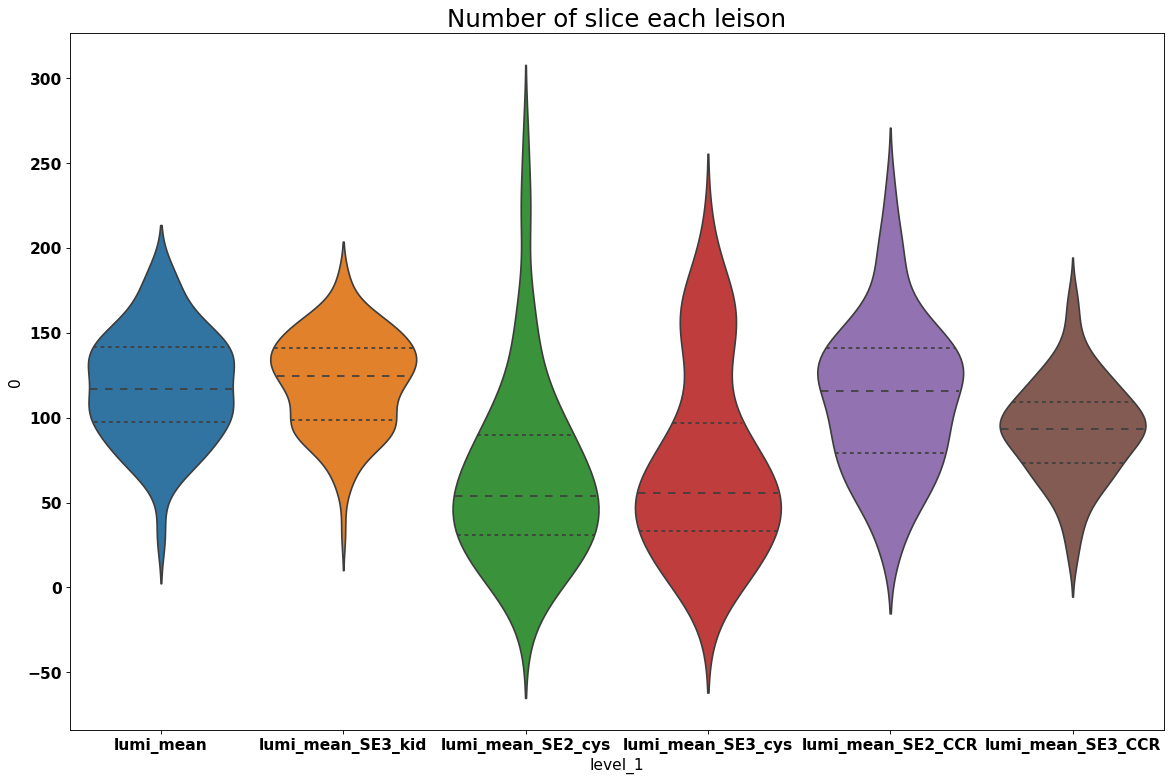

In [14]:
cols=['lumi_mean', 'lumi_mean_SE3_kid','lumi_mean_SE2_CCR','lumi_mean_SE3_CCR','lumi_mean_SE2_cys','lumi_mean_SE3_cys']
#縦持ちデータに変換
plt.rcParams["font.size"] = 14
plt.rcParams["font.weight"] = 800
count_df=st_df[cols].stack().reset_index()
plt.figure(figsize=(15,10), dpi=80)
sns.violinplot(x='level_1', y=0, data=count_df, scale='width', inner='quartile')
plt.title('Number of slice each leison', fontsize=22)
plt.tight_layout()
plt.savefig('../output/EDA_result/1030/violin_lumi_mean.png')

plt.show()

In [38]:
count_df=count_df.pivot_table(values=[0],index=['index'],columns=['level_1'])

### preprocess_df

In [34]:
# いらない列消したり、列名変えたり
# import re
# shape_cols=[col for col in st_df.columns if 'shape' in col]
# for col in shape_cols:
#     st_df[col]=st_df[col].fillna('(0,0,0)').apply(lambda x:int(x.split(',')[0][1:]))
# st_df.drop(columns=['shape','shape_SE2_CCR','shape_SE2_cys'],inplace=True)
# shape_cols=[col for col in st_df.columns if'shape_SE3' in col]
# new_shape_cols=[re.sub('_SE3','',col) for col in shape_cols]
# col_dict=dict(zip(shape_cols,new_shape_cols))
# st_df.rename(columns=col_dict,inplace=True)
# count_cols=[col for col in st_df.columns if 'count_SE3' in col]
# st_df.drop(columns=count_cols,inplace=True)
# cols=[col for col in st_df.columns if 'count_' in col]
# new_cols=[re.sub('_SE2','',col) for col in cols]
# col_dict=dict(zip(cols,new_cols))
# st_df.rename(columns=col_dict,inplace=True)

# 並び替え
# cols=[col for col in st_df.columns if 'lumi_' in col]
# lumi_df=st_df[cols]
# shape_df=st_df.drop(columns=cols)
# st_df=pd.concat([shape_df,lumi_df],axis=1)
# st_df.to_csv(statistics_path)

### check_count

In [35]:
#st_df.to_csv(statistics_path)

In [36]:
#count_df=st_df[cols].stack().reset_index()


,index,level_1,0
0,1,lumi_mean,166.598161
1,1,lumi_mean_SE3_kid,134.416410
2,1,lumi_mean_SE2_cys,82.933779
3,1,lumi_mean_SE3_cys,87.345610
4,2,lumi_mean,187.855472
...,...,...,...
581,157,lumi_mean_SE3_cys,18.139643
582,159,lumi_mean,27.597880
583,159,lumi_mean_SE3_kid,32.055405
584,159,lumi_mean_SE2_cys,32.077008


In [39]:
count_cols=[col for col in st_df.columns if 'count' in col]
count_cols=[col for col in count_cols if 'SE3' in col]

cou_df=st_df[count_cols].fillna(0)

In [19]:
cou_df.columns=['kid','ccrcc','cyst']

ValueError: Length mismatch: Expected axis has 0 elements, new values have 3 elements

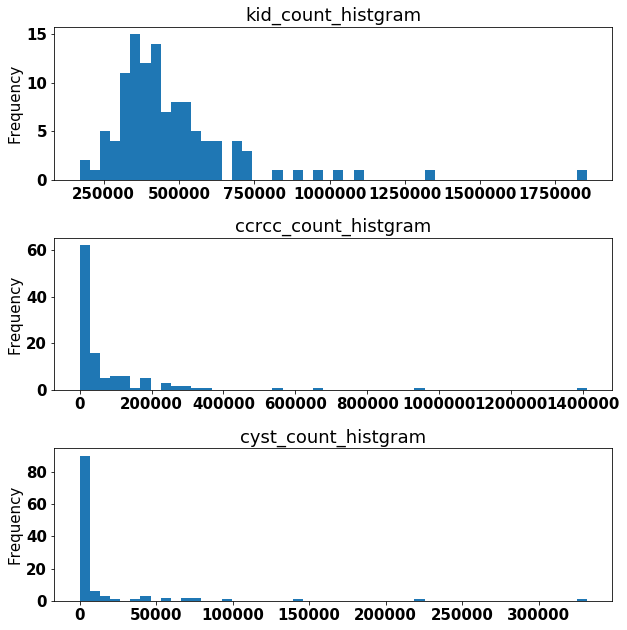

In [50]:
fig=plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(311)


plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = 800


ax1=(cou_df['kid'].plot.hist(bins=50))
ax1.set_title('kid_count_histgram')

ax2 = fig.add_subplot(312)
ax2=(cou_df['ccrcc'].plot.hist(bins=50))
ax2.set_title('ccrcc_count_histgram')
ax3 = fig.add_subplot(313)

ax3=(cou_df['cyst'].plot.hist(bins=50))
ax3.set_title('cyst_count_histgram')


plt.tight_layout()
plt.savefig("pixel_count.png")
plt.show()



In [52]:
cys_med=cou_df['cyst'].median()
ccr_med=cou_df['ccrcc'].median()
cou_df['type']=0


In [83]:
cou_df=cou_df.reset_index()

train  
['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '016', '017', '018', '019', '025', '028', '029', '030', '031', '032', '039','014', '015', '021', '022', '023', '024', '026', '033', '034', '035', '036', '037', '038', '040', '041', '044', '045', '046', '047', '051', '055', '057', '064', '065','053', '058', '060', '061', '062', '063', '066', '067', '068', '069', '071', '072', '073', '074', '076', '077', '078', '079', '083', '086', '093', '094']

valid  
['082', '088', '090', '095', '096', '097', '098', '101', '102', '103', '104', '105', '107', '109', '112', '113', '117', '118', '122', '123', '125', '130']

test  
['115', '119', '121', '124', '126', '127', '134', '135', '136', '138', '140', '142', '145', '146', '147', '149', '150', '151', '152', '154', '157', '159']

In [92]:
# cou_df.to_csv('./pix_count_with_type.csv')

In [103]:
for i in range(4):
    print(f'type{i}:',cou_df.loc[cou_df['type']==i,'index'].values)

type0: [  3  16  17  18  19  21  22  33  35  37  53  63  69  72  77  90  95  96
 107 123 124 126 127 140 150]
type1: [  1   2   5   7   9  10  13  14  15  23  24  26  36  55  61  62  68  74
  93  94  97 103 113 118 122 125 135 146 149 154 157 159]
type2: [  6   8  12  25  28  29  32  34  38  41  44  46  51  57  58  60  71  76
  83  86  88 102 104 105 109 112 115 119 121 134 136 147]
type3: [  4  11  30  31  39  40  45  47  64  65  66  67  73  78  79  82  98 101
 117 130 138 142 145 151 152]


In [53]:
#ピクセル数に応じてタイプを分類する
cou_df.loc[cou_df.query(f'cyst<{cys_med}&ccrcc<{ccr_med}').index,'type']=0
cou_df.loc[cou_df.query(f'cyst>={cys_med}&ccrcc<{ccr_med}').index,'type']=1
cou_df.loc[cou_df.query(f'cyst<{cys_med}&ccrcc>={ccr_med}').index,'type']=2
cou_df.loc[cou_df.query(f'cyst>={cys_med}&ccrcc>={ccr_med}').index,'type']=3



In [46]:
cou_df=pd.read_csv('../output/csv/pix_count_with_type.csv')

In [52]:
#タイプを程よく分けたもの。ここからtrain:val:test=3:1:1で選ぶ
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
cid_list=[]
for train_index, test_index in skf.split(cou_df, cou_df['type']):
    cid_list.append([str(i).zfill(3) for i in cou_df.loc[test_index,'index'].values])


In [55]:
pop=cid_list.pop(3)

In [58]:
cou_df=pd.read_csv('../output/csv/pix_count_with_type.csv')
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
train=[]
for train_index, test_index in skf.split(cou_df, cou_df['type']):
    train.append([str(i).zfill(3) for i in cou_df.loc[test_index,'index'].values])


In [59]:
print(train)

[['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '016', '017', '018', '019', '025', '028', '029', '030', '031', '032', '039'], ['014', '015', '021', '022', '023', '024', '026', '033', '034', '035', '036', '037', '038', '040', '041', '044', '045', '046', '047', '051', '055', '057', '064', '065'], ['053', '058', '060', '061', '062', '063', '066', '067', '068', '069', '071', '072', '073', '074', '076', '077', '078', '079', '083', '086', '093', '094'], ['082', '088', '090', '095', '096', '097', '098', '101', '102', '103', '104', '105', '107', '109', '112', '113', '117', '118', '122', '123', '125', '130'], ['115', '119', '121', '124', '126', '127', '134', '135', '136', '138', '140', '142', '145', '146', '147', '149', '150', '151', '152', '154', '157', '159']]


バリデーションを分けるためのコード    
fold3が今までの実験の分け方。  
今までの実験を無駄にしないために、分け方をハードコーディングしてしまった。  

In [70]:
import requests
def send_line_notification(message):
    line_token = '7T12MMobxZMTOMrvNOMgFnfuVSnj2qxaj4oT9SW4iHT' # 終わったら無効化する
    endpoint = 'https://notify-api.line.me/api/notify'
    message = "\n{}".format(message)
    payload = {'message': message}
    headers = {'Authorization': 'Bearer {}'.format(line_token)}
    requests.post(endpoint, data=payload, headers=headers)
    
send_line_notification('ttttest')

In [56]:
def split_train_val(fold=3):
    #タイプを程よく分けたもの。ここからtrain:val:test=3:1:1で選ぶ
    cou_df=pd.read_csv('../output/csv/pix_count_with_type.csv')
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=5)
    train=[]
    for train_index, test_index in skf.split(cou_df, cou_df['type']):
        train.append([str(i).zfill(3) for i in cou_df.loc[test_index,'index'].values])
    valid=train.pop(fold)
    return train,valid
train_val_test(cid_list)

([['001',
   '002',
   '003',
   '004',
   '005',
   '006',
   '007',
   '008',
   '009',
   '010',
   '011',
   '012',
   '013',
   '016',
   '017',
   '018',
   '019',
   '025',
   '028',
   '029',
   '030',
   '031',
   '032',
   '039'],
  ['014',
   '015',
   '021',
   '022',
   '023',
   '024',
   '026',
   '033',
   '034',
   '035',
   '036',
   '037',
   '038',
   '040',
   '041',
   '044',
   '045',
   '046',
   '047',
   '051',
   '055',
   '057',
   '064',
   '065'],
  ['053',
   '058',
   '060',
   '061',
   '062',
   '063',
   '066',
   '067',
   '068',
   '069',
   '071',
   '072',
   '073',
   '074',
   '076',
   '077',
   '078',
   '079',
   '083',
   '086',
   '093',
   '094'],
  ['115',
   '119',
   '121',
   '124',
   '126',
   '127',
   '134',
   '135',
   '136',
   '138',
   '140',
   '142',
   '145',
   '146',
   '147',
   '149',
   '150',
   '151',
   '152',
   '154',
   '157',
   '159']],
 ['082',
  '088',
  '090',
  '095',
  '096',
  '097',
  '098',
  '101',
  '

In [68]:
def split_train_val(fold=0):
    train=[['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '016', '017', '018', '019', '025', '028', '029', '030', '031', '032', '039'], ['014', '015', '021', '022', '023', '024', '026', '033', '034', '035', '036', '037', '038', '040', '041', '044', '045', '046', '047', '051', '055', '057', '064', '065'], ['053', '058', '060', '061', '062', '063', '066', '067', '068', '069', '071', '072', '073', '074', '076', '077', '078', '079', '083', '086', '093', '094'], ['082', '088', '090', '095', '096', '097', '098', '101', '102', '103', '104', '105', '107', '109', '112', '113', '117', '118', '122', '123', '125', '130']]
    valid=train.pop(fold)
    return train,valid
print(train_val_test(cid_list,3))

([['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '016', '017', '018', '019', '025', '028', '029', '030', '031', '032', '039'], ['014', '015', '021', '022', '023', '024', '026', '033', '034', '035', '036', '037', '038', '040', '041', '044', '045', '046', '047', '051', '055', '057', '064', '065'], ['053', '058', '060', '061', '062', '063', '066', '067', '068', '069', '071', '072', '073', '074', '076', '077', '078', '079', '083', '086', '093', '094'], ['115', '119', '121', '124', '126', '127', '134', '135', '136', '138', '140', '142', '145', '146', '147', '149', '150', '151', '152', '154', '157', '159']], ['082', '088', '090', '095', '096', '097', '098', '101', '102', '103', '104', '105', '107', '109', '112', '113', '117', '118', '122', '123', '125', '130'])


In [54]:
cou_df['log_ccrcc']=np.log10(cou_df['ccrcc']+1)
cou_df['log_cyst']=np.log10(cou_df['cyst']+1)

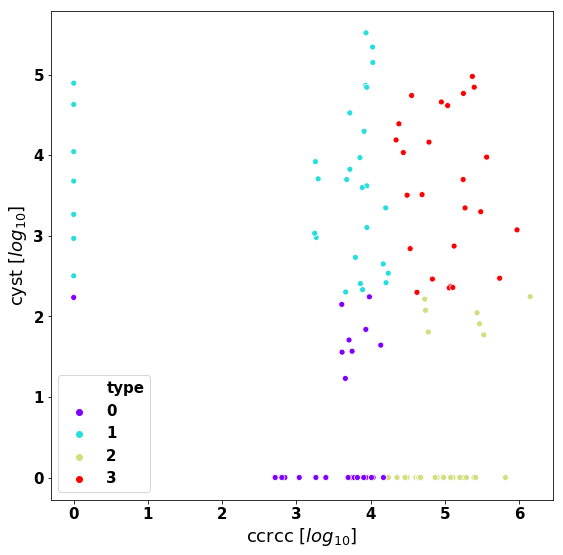

In [69]:
import seaborn as sns
fig=plt.figure(figsize=(9,9))
sns.set_palette('deep')

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = 800

sns.scatterplot(x='log_ccrcc',y='log_cyst',hue='type',data=cou_df,palette='rainbow')
plt.xlabel("ccrcc $[log_{10}]$", fontsize=18)
plt.ylabel("cyst $[log_{10}]$", fontsize=18)
plt.savefig('cyst_ccrcc_count_scatter_withhue.png')

plt.show()


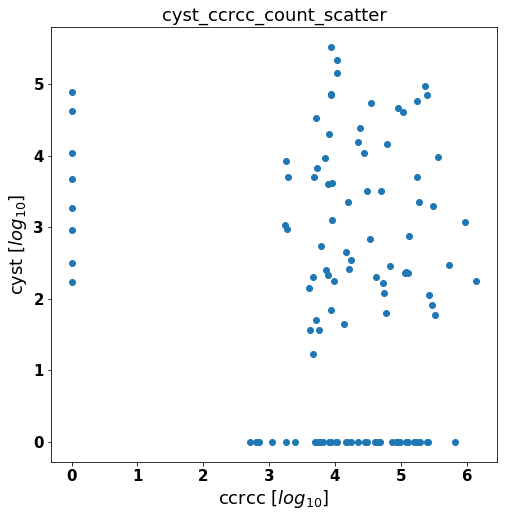

In [14]:
fig=plt.figure(figsize=(8,8),)


plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = 800

ax = plt.gca()
ax.scatter(np.log10(cou_df['ccrcc']+1) ,np.log10(cou_df['cyst']+1))
ax.set_title('cyst_ccrcc_count_scatter')
plt.xlabel("ccrcc $[log_{10}]$", fontsize=18)
plt.ylabel("cyst $[log_{10}]$", fontsize=18)
plt.savefig('cyst_ccrcc_count_scatter.png')
plt.show()


In [ ]:
import seaborn as sns
plt.yscale('log')
# f, ax = plt.subplots(figsize=(7, 7))
grid = sns.FacetGrid(cou_df, size=10)
grid.map(plt.scatter, 'ccrcc', 'cyst')
# grid.set(xlim=(0, 10000), ylim=(0, 10000), xticks=[10, 30, 50], yticks=[2, 6, 10])
grid.set(xlim=(-10000, 1500000), ylim=(-10000, 1500000))


In [ ]:
import seaborn as sns
# f, ax = plt.subplots(figsize=(7, 7))
grid = sns.FacetGrid(cou_df, size=10)
grid.map(plt.scatter, 'ccrcc', 'cyst')
# grid.set(xlim=(0, 10000), ylim=(0, 10000), xticks=[10, 30, 50], yticks=[2, 6, 10])
grid.set(xlim=(-10000, 400000), ylim=(-10000, 400000))